In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
from PIL import Image
import numpy as np


In [9]:
# import import_ipynb
# from data_preprocessing import *
# 불러와서 함수만 사용하려고 했는데 ㅠ 더 까다로운듯

In [52]:
import pandas as pd
import numpy as np
from konlpy.tag import Mecab
import re

In [11]:
def load_data(path):
    """
    path = 'D:/AIB/CP1/여행계획.xlsx'
    """
    df = pd.DataFrame()
    data = pd.read_excel(path)
    return data

In [12]:
data = load_data('D:/AIB/CP1/벚꽃놀이.xlsx')

In [17]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   list_name  2200 non-null   object
 1   name       2200 non-null   object
 2   views      2200 non-null   object
 3   comment    2198 non-null   object
 4   like_num   2200 non-null   object
dtypes: object(5)
memory usage: 86.1+ KB


In [21]:
def emoticon_del(data):
    # #이모티콘 제거
    # emoji_pattern = re.compile("["
    #     u"\U0001F600-\U0001F64F"  # emoticons
    #     u"\U0001F300-\U0001F5FF"  # symbols & pictographs
    #     u"\U0001F680-\U0001F6FF"  # transport & map symbols
    #     u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
    #                        "]+", flags=re.UNICODE)
    #분석에 어긋나는 불용어구 제외 (특수문자, 의성어)
    han = re.compile(r'[ㄱ-ㅎㅏ-ㅣ!?~,"a-zA-z0-9:.\n\r#\ufeff\u200d]')

    comment_list = []
    for i in range(len(data)):
        comment_list.append(data['comment'].iloc[i])

    comment_result = []
    for i in comment_list:
        # tokens = re.sub(emoji_pattern,"",str(i))
        tokens = re.sub(han,"",str(i))
        comment_result.append(tokens)
    comment_result = pd.DataFrame(comment_result, columns=["comment"])
    data['comment'] = comment_result 

    return data


In [24]:
data = emoticon_del(data)

In [25]:
data

,list_name,name,views,comment,like_num
0,[장기연애],벚꽃놀이,"조회수 5,391,893회",김치찌개 드실때부터 생각한건데 음식을 너무 찰지게 드심,1.8만
1,[장기연애],벚꽃놀이,"조회수 5,391,893회",떨어진 꽃잎을 모으는 것만큼 아름다운 것은 없어,1.4천
2,[장기연애],벚꽃놀이,"조회수 5,391,893회",자기 자리만 정성스럽게 먼지털고 휴지 대신 낙옆 주워서 닦으라고 주네찐사랑인듯,8.2천
3,[장기연애],벚꽃놀이,"조회수 5,391,893회",봉지 돌리면서 뛰어오시는거 너무 웃기고 기여우심,4.3천
4,[장기연애],벚꽃놀이,"조회수 5,391,893회",벚꽃 뿌려달라 할때 나무 발로 차는게 아니라 떨어진 꽃잎 모아서 쓴거 착해,4.6천
...,...,...,...,...,...
2195,[장기연애],벚꽃놀이,"조회수 5,391,893회",힝야,0
2196,[장기연애],벚꽃놀이,"조회수 5,391,893회",벤치 닦고 지가 앉아,0
2197,[장기연애],벚꽃놀이,"조회수 5,391,893회",용현동 신도브래뉴 오르막길 전체가 벚꽃입니다 오세요,0
2198,[장기연애],벚꽃놀이,"조회수 5,391,893회",한시간만에 만,0


In [26]:
def tokenizer(data):
    # 불용어(포함 안 시킬 단어) 처리 
    stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', 
    '임', '게', '만', '게임', '겜', '되', '음', '면', '!', '.', ',', '~', '?', 'ㅡ', 'ㅠ', 'ㅜ']

    ##C드라이브 Mecab이 설치되어 있는 곳 -> dicpath로 넣어주어야함
    mecab = Mecab(dicpath=r"C:/mecab/mecab-ko-dic") 
    
    data['tokenized'] = data['comment'].apply(mecab.morphs) #형태소 추출
    data['tokenized'] = data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [27]:
tokenizer(data)
data

,list_name,name,views,comment,like_num,tokenized
0,[장기연애],벚꽃놀이,"조회수 5,391,893회",김치찌개 드실때부터 생각한건데 음식을 너무 찰지게 드심,1.8만,"[김치찌개, 드실, 때, 부터, 생각, 건데, 음식, 너무, 찰지, 드, 심]"
1,[장기연애],벚꽃놀이,"조회수 5,391,893회",떨어진 꽃잎을 모으는 것만큼 아름다운 것은 없어,1.4천,"[떨어진, 꽃잎, 모으, 것, 만큼, 아름다운, 것, 없, 어]"
2,[장기연애],벚꽃놀이,"조회수 5,391,893회",자기 자리만 정성스럽게 먼지털고 휴지 대신 낙옆 주워서 닦으라고 주네찐사랑인듯,8.2천,"[자기, 자리, 정성, 스럽, 먼지, 털, 휴지, 대신, 낙, 옆, 주워서, 닦, ..."
3,[장기연애],벚꽃놀이,"조회수 5,391,893회",봉지 돌리면서 뛰어오시는거 너무 웃기고 기여우심,4.3천,"[봉지, 돌리, 면서, 뛰어오, 시, 거, 너무, 웃기, 기여, 우심]"
4,[장기연애],벚꽃놀이,"조회수 5,391,893회",벚꽃 뿌려달라 할때 나무 발로 차는게 아니라 떨어진 꽃잎 모아서 쓴거 착해,4.6천,"[벚꽃, 뿌려, 달, 라, 할, 때, 나무, 발, 로, 차, 아니, 라, 떨어진, ..."
...,...,...,...,...,...,...
2195,[장기연애],벚꽃놀이,"조회수 5,391,893회",힝야,0,"[힝, 야]"
2196,[장기연애],벚꽃놀이,"조회수 5,391,893회",벤치 닦고 지가 앉아,0,"[벤치, 닦, 앉, 아]"
2197,[장기연애],벚꽃놀이,"조회수 5,391,893회",용현동 신도브래뉴 오르막길 전체가 벚꽃입니다 오세요,0,"[용현동, 신, 브, 래, 뉴, 오르막길, 전체, 벚꽃, 입니다, 오, 세, 요]"
2198,[장기연애],벚꽃놀이,"조회수 5,391,893회",한시간만에 만,0,[시간]


In [67]:
# 전체 코멘트를 하나의 리스트에 담기
comment_sum = []
for i in range(len(data)):
    comment_sum.append(data['comment'].iloc[i])

In [74]:
# 형태소 분석을 해주기 위해 컬럼을 하나의 문자열로 만들어주기 
str_comment_sum = " ".join(comment_sum)

In [ ]:
# 문자열로 떳는지 확인 
str_comment_sum

In [ ]:
# 전체 comment에서 형태소 단위로 분리 
mecab = Mecab(dicpath=r"C:/mecab/mecab-ko-dic") 
morphs = mecab.morphs(str_comment_sum)
morphs

In [78]:
# morphs 단어 길이가 2 이상만 
words = [n for n in morphs if len(n) > 1]

In [79]:
# words에서 단어의 개수에 맞춰서 카운팅 
c = Counter(words)

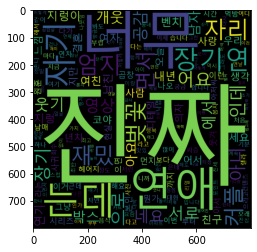

In [80]:
#워드크라우드로 보이게 하기 
wc = WordCloud(font_path='malgun', width=400, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)

In [82]:
type(gen)

wordcloud.wordcloud.WordCloud